# House Pricing Predictions

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Dataset and Overview

In [2]:
df = pd.read_csv('train.csv')

In [3]:
len(df)

1460

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#df.info()

In [6]:
#df.describe().transpose()

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

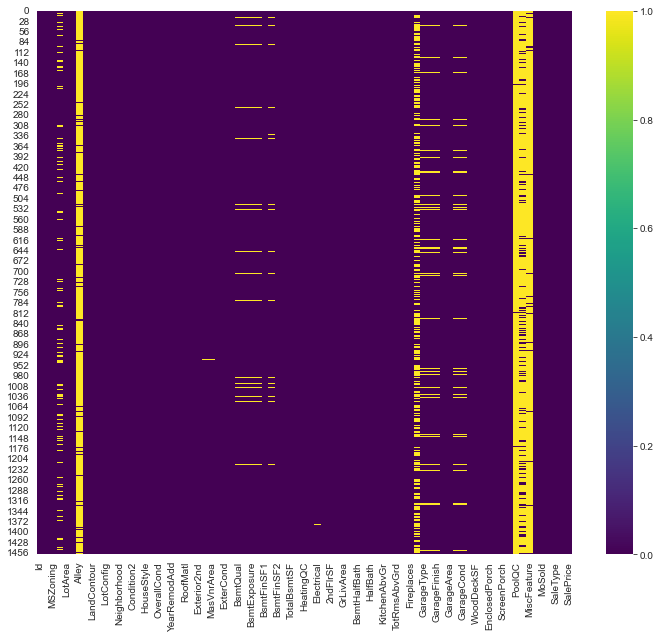

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis')

# EDA (Exploratoty Data Analyses)

## MSSubClass

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

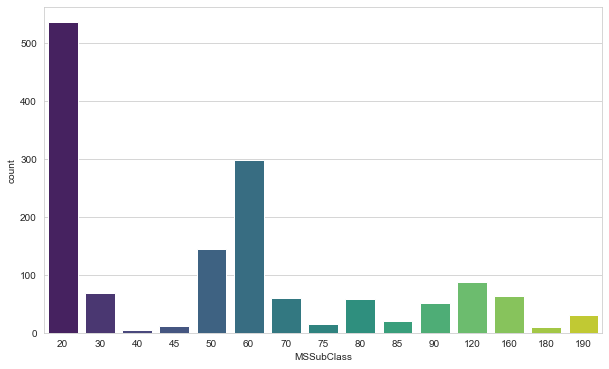

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='MSSubClass', data=df, palette='viridis')

Conclusion: We can that the majority of houses are 20: 1-STORY 1946 & NEWER ALL STYLES and 60: 2-STORY 1946 & NEWER, houses that are made in 1946 and newer.

## LotArea

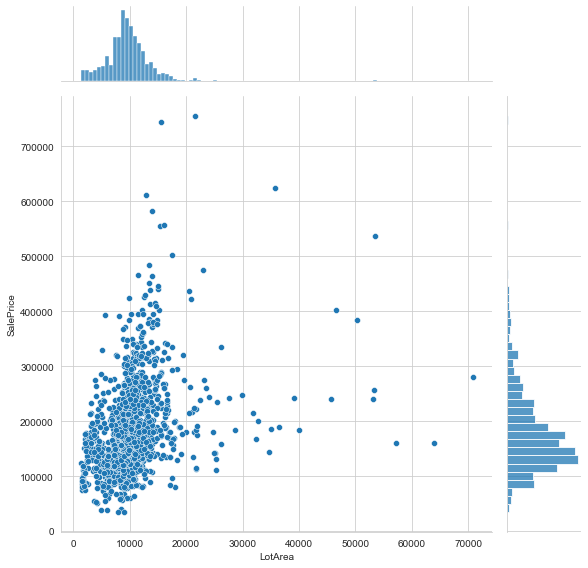

In [10]:
sns.jointplot(x='LotArea', y='SalePrice', data=df[df['LotArea'] < 100000], height=8)

## Street

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

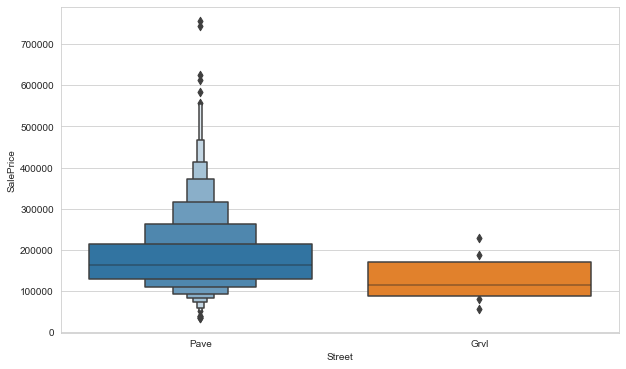

In [11]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Street', y='SalePrice', data=df)

## LotShape

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

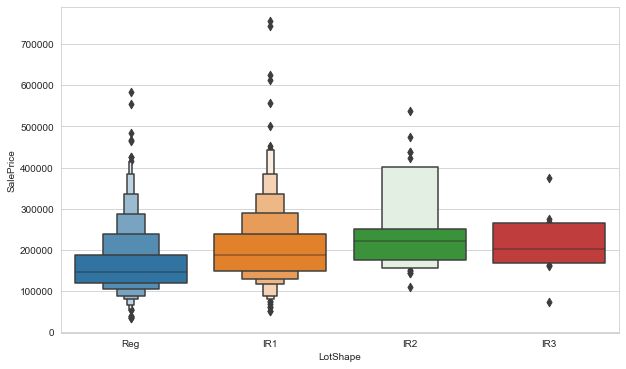

In [12]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='LotShape', y='SalePrice', data=df)

<AxesSubplot:xlabel='LotShape', ylabel='count'>

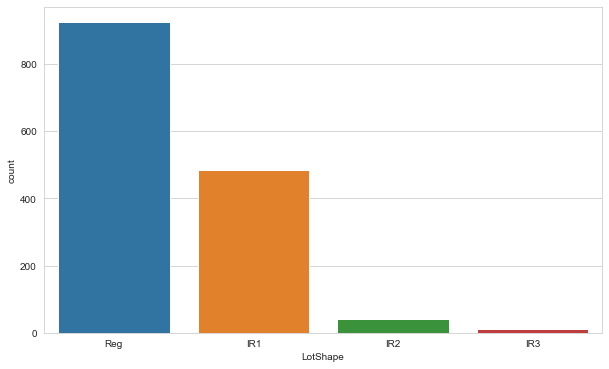

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='LotShape', data=df)

## LandContour

In [14]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

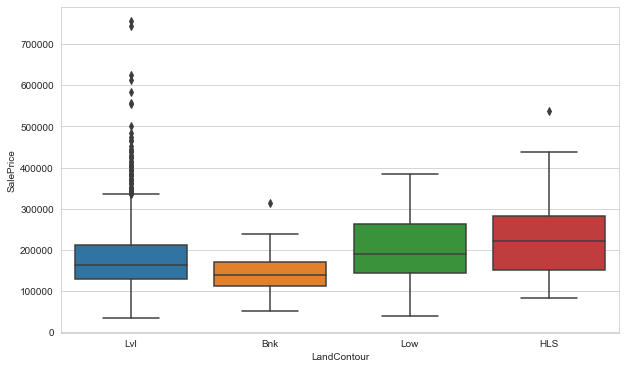

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LandContour', y='SalePrice', data=df)

## Utilities

In [16]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

## Neighborhood

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

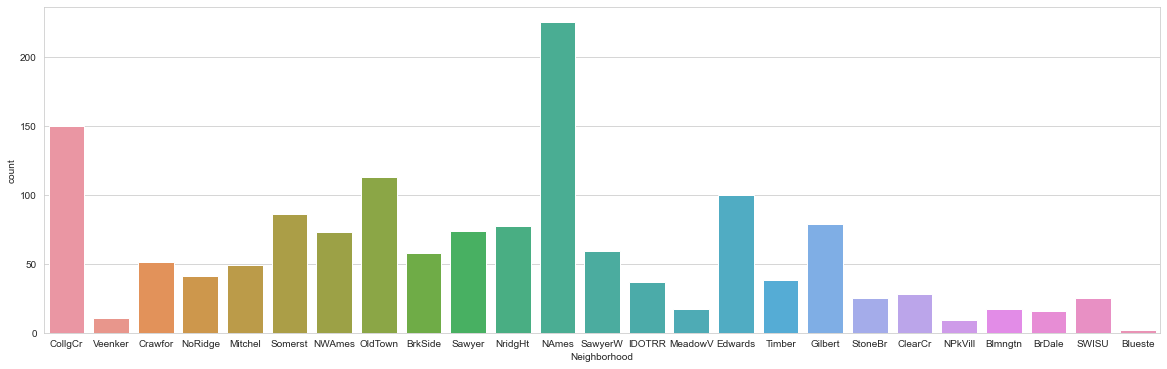

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x='Neighborhood', data=df)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

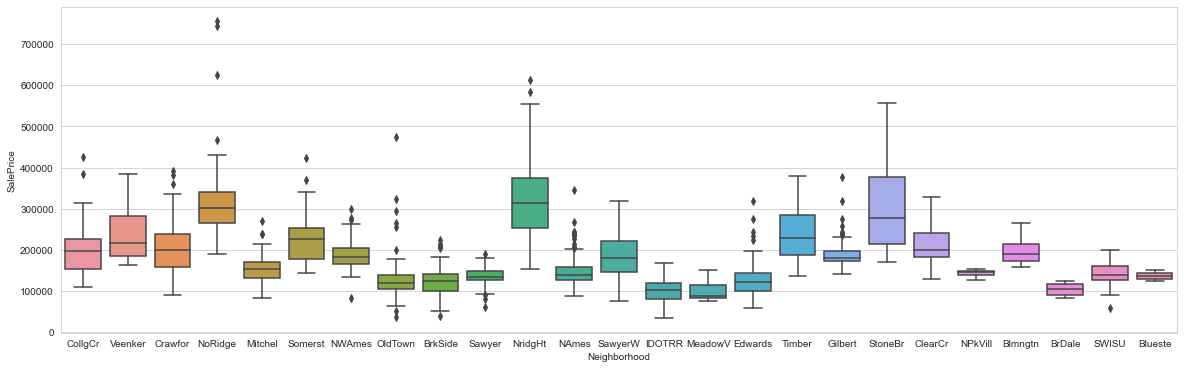

In [18]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)

## OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

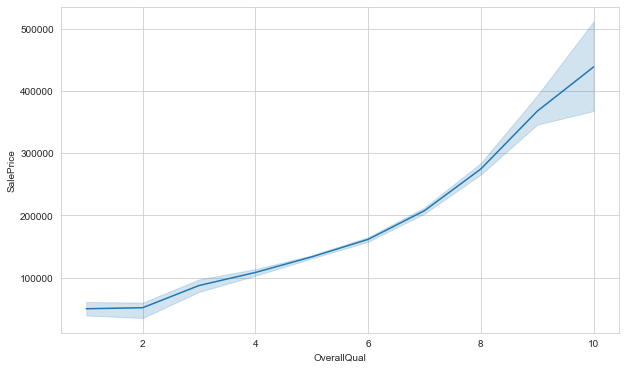

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x='OverallQual', y='SalePrice', data=df)

## OverallCond

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

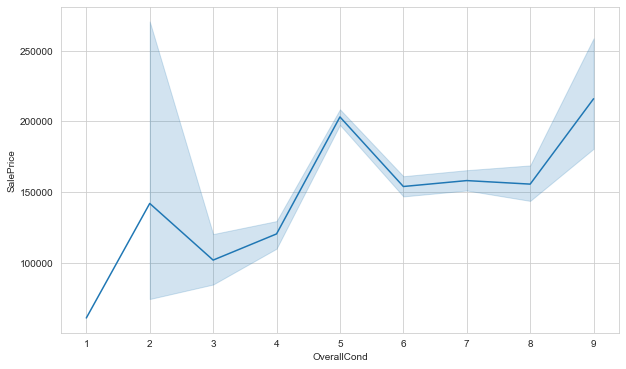

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='OverallCond', y='SalePrice', data=df)

# Data Cleaning
## Missing Values

<AxesSubplot:>

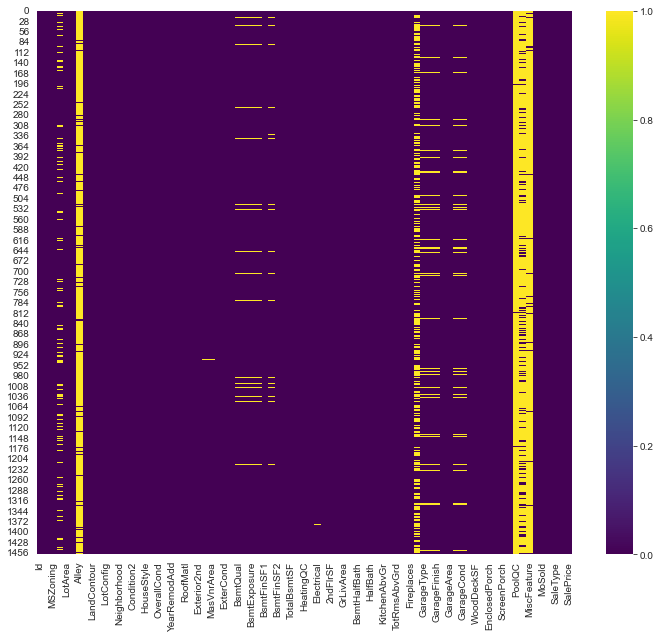

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis')

In [22]:
df.columns[df.isnull().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

### LotFrontage

In [23]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

### Alley

In [24]:
df['Alley'] = df['Alley'].replace(to_replace=np.nan, value='Noalley')

### MasVnrType

In [25]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [26]:
df['MasVnrType'].isnull().sum()

8

In [27]:
df['MasVnrType'] = df['MasVnrType'].replace(to_replace=np.nan, value='None')

In [28]:
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

### MasVnrArea

In [29]:
df[df['MasVnrArea'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


In [30]:
df[df['MasVnrType'] == 'None']['MasVnrArea'].value_counts()

0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: MasVnrArea, dtype: int64

In [31]:
df['MasVnrArea'] = df['MasVnrArea'].replace(to_replace=np.nan, value=0.0)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [32]:
df[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df[['BsmtQual','BsmtCond', 
                                                                                  'BsmtExposure', 'BsmtFinType1', 
                                                                                  'BsmtFinType2']].replace(to_replace=np.nan, 
                                                                                                           value='NoBase')

### Electrical

In [33]:
df[df['Electrical'].isnull()][['Electrical', 'Heating', 'HeatingQC', 'CentralAir']]

,Electrical,Heating,HeatingQC,CentralAir
1379,NaN,GasA,Gd,Y


In [34]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
df[df['Heating'] == 'GasA']['Electrical'].value_counts()

SBrkr    1315
FuseA      87
FuseF      21
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
df['Electrical'] = df['Electrical'].replace(to_replace=np.nan, value='SBrkr')

### FireplaceQu

In [37]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [38]:
df['FireplaceQu'].isnull().sum()

690

In [39]:
df[df['Fireplaces'] == 0][['Fireplaces', 'FireplaceQu']].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


In [40]:
df['FireplaceQu'] = df['FireplaceQu'].replace(to_replace=np.nan, value='NoFp')

### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

In [41]:
df[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA


<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

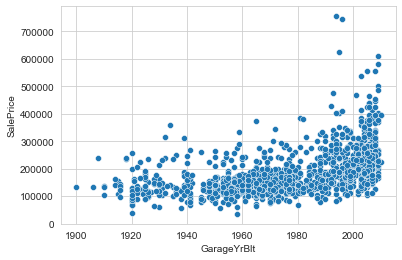

In [42]:
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df)

In [43]:
df[['GarageType','GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType','GarageFinish', 
                                                                    'GarageQual', 'GarageCond']].replace(to_replace=np.nan, 
                                                                                                         value='NoGar')

In [44]:
df['GarageYrBlt'] = df['GarageYrBlt'].replace(to_replace=np.nan, value=0)

### PoolQC, Fence, MiscFeature

In [45]:
df[['PoolQC', 'Fence','MiscFeature']].isnull().sum()

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [46]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [47]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [48]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [49]:
df['PoolQC'] = df['PoolQC'].replace(to_replace=np.nan, value='NoPool')

In [50]:
df['Fence'] = df['Fence'].replace(to_replace=np.nan, value='NoFence')

In [51]:
df['MiscFeature'] = df['MiscFeature'].replace(to_replace=np.nan, value='NoMisc')

## Create Dummy Variables

In [52]:
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Noalley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Noalley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Noalley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Noalley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,NoMisc,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Noalley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,NoMisc,0,12,2008,WD,Normal,250000


In [54]:
df = pd.get_dummies(df, drop_first=True)

In [55]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train, y_train)

LinearRegression()

## Predictions for Linear Regression Model

In [62]:
linear_pred = model.predict(X_test)

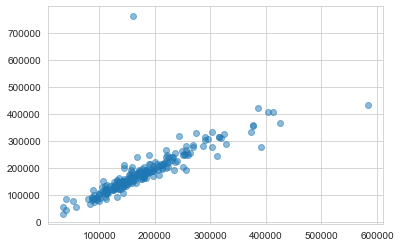

In [63]:
plt.scatter(y_test, linear_pred, alpha=0.5)

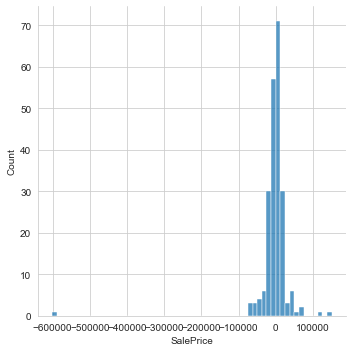

In [64]:
sns.displot((y_test-linear_pred),bins=60);

## Evaluation

In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, linear_pred))
print('MSE:', metrics.mean_squared_error(y_test, linear_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_pred)))

MAE: 17801.331536380825
MSE: 2211293854.186473
RMSE: 47024.39637237753


In [67]:
df['SalePrice'].mean()

180921.19589041095

In [68]:
19000/180921

0.10501821236893451

# Test Dataset

In [69]:
df_test = pd.read_csv('test.csv')

In [70]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

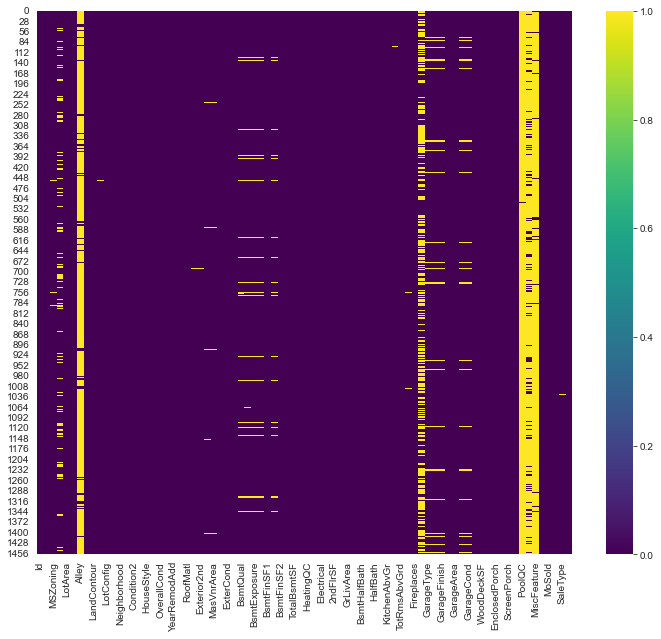

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(), cmap='viridis')

## Missing Values

In [72]:
df_test.columns[df_test.isnull().sum() > 0]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

### MSZoning

In [73]:
df_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [74]:
df_test['MSZoning'].isnull().sum()

4

In [75]:
df_test[df_test['MSZoning'].isnull()][['MSSubClass', 'MSZoning']]

,MSSubClass,MSZoning
455,30,NaN
756,20,NaN
790,70,NaN
1444,20,NaN


In [76]:
df_test[df_test['MSSubClass'] == 30]['MSZoning'].mode()[0]

'RM'

In [77]:
def mode_MSZone(value, mode):
    if pd.isna(value):
        return df_test[df_test['MSSubClass'] == mode]['MSZoning'].mode()[0]
    else: return value

In [78]:
df_test['MSZoning'] = df_test.apply(lambda x: mode_MSZone(x['MSZoning'], x['MSSubClass']), axis=1)

### LotFrontage

In [79]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df['LotFrontage'].mean())

### Alley

In [80]:
df_test['Alley'] = df_test['Alley'].replace(to_replace=np.nan, value='Noalley')

### Utilities

In [81]:
df_test[df_test['Utilities'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,RM,109.000000,21780,Grvl,Noalley,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
485,1946,20,RL,70.049958,31220,Pave,Noalley,IR1,Bnk,NaN,...,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal


In [82]:
df_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [83]:
df_test['Utilities'] = df_test['Utilities'].replace(to_replace=np.nan, value='AllPub')

### Exterior1st, Exterior2nd

In [84]:
df_test[df_test['Exterior1st'].isnull()][['RoofMatl','Exterior1st', 'Exterior2nd']]

,RoofMatl,Exterior1st,Exterior2nd
691,Tar&Grv,NaN,NaN


In [85]:
df_test[df_test['RoofMatl'] == 'Tar&Grv'][['Exterior1st', 'Exterior2nd']].value_counts()

Exterior1st  Exterior2nd
Plywood      Plywood        5
HdBoard      HdBoard        1
Plywood      CBlock         1
             Wd Shng        1
VinylSd      VinylSd        1
Wd Sdng      Wd Sdng        1
WdShing      Wd Shng        1
dtype: int64

In [86]:
df_test[['Exterior1st', 'Exterior2nd']] = df_test[['Exterior1st', 
                                                   'Exterior2nd']].replace(to_replace=np.nan, 
                                                                           value='Plywood')

### MasVnrType, MasVnrArea

In [87]:
df_test[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    16
MasVnrArea    15
dtype: int64

In [88]:
df_test['MasVnrType'] = df_test['MasVnrType'].replace(to_replace=np.nan, value='None')
df_test['MasVnrArea'] = df_test['MasVnrArea'].replace(to_replace=np.nan, value=0.0)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF,  TotalBsmtSF, BsmtFullBath, BsmtHalfBath

In [89]:
df_test[['BsmtQual','BsmtCond', 'BsmtExposure', 
         'BsmtFinType1', 'BsmtFinType2']] = df_test[['BsmtQual','BsmtCond', 
                                                     'BsmtExposure', 'BsmtFinType1', 
                                                     'BsmtFinType2']].replace(to_replace=np.nan, value='NoBase')

In [90]:
df_test[['BsmtFinSF1', 'BsmtFinSF2', 
         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
         'BsmtHalfBath']] = df_test[['BsmtFinSF1', 'BsmtFinSF2', 
         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
         'BsmtHalfBath']].replace(to_replace=np.nan, value=0.0)

### KitchenQual, Functional, FireplaceQu

In [91]:
df_test[['KitchenQual', 'Functional', 'FireplaceQu']].isnull().sum()

KitchenQual      1
Functional       2
FireplaceQu    730
dtype: int64

In [92]:
df_test['KitchenQual'] = df_test['KitchenQual'].replace(to_replace=np.nan, value='TA')

In [93]:
df_test['Functional'] = df_test['Functional'].replace(to_replace=np.nan, value='Typ')

In [94]:
df_test[df_test['Fireplaces'] == 0][['Fireplaces', 'FireplaceQu']].head()

,Fireplaces,FireplaceQu
0,0,NaN
1,0,NaN
4,0,NaN
6,0,NaN
9,0,NaN


In [95]:
df_test[df_test['FireplaceQu'].isnull()]['Fireplaces'].sum()

0

In [96]:
df_test['FireplaceQu'] = df_test['FireplaceQu'].replace(to_replace=np.nan, value='NoFp')

### GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond

In [97]:
df_test[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']].isnull().sum()

GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
dtype: int64

In [98]:
df_test[['GarageType','GarageFinish', 
         'GarageQual', 'GarageCond']] = df_test[['GarageType','GarageFinish', 
                                            'GarageQual', 'GarageCond']].replace(to_replace=np.nan, 
                                                                                value='NoGar')

In [99]:
df_test[['GarageYrBlt', 'GarageCars', 'GarageArea']].isnull().sum()

GarageYrBlt    78
GarageCars      1
GarageArea      1
dtype: int64

In [100]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].replace(to_replace=np.nan, value=0)

In [101]:
df_test[df_test['GarageCars'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,Detchd,0.0,NoGar,NaN,NaN,NoGar,NoGar


In [102]:
df_test['GarageCars'] = df_test['GarageCars'].replace(to_replace=np.nan, value=0)
df_test['GarageArea'] = df_test['GarageArea'].replace(to_replace=np.nan, value=0)

### PoolQC, Fence, MiscFeature

In [103]:
df_test[['PoolQC', 'Fence', 'MiscFeature']].isnull().sum()

PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

In [104]:
df_test['PoolQC'] = df_test['PoolQC'].replace(to_replace=np.nan, value='NoPool')
df_test['Fence'] = df_test['Fence'].replace(to_replace=np.nan, value='NoFence')
df_test['MiscFeature'] = df_test['MiscFeature'].replace(to_replace=np.nan, value='NoMisc')

### SaleType

In [105]:
df_test['SaleType'].isnull().sum()

1

In [106]:
df_test['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [107]:
df_test[df_test['SaleType'].isnull()][['SaleType', 'SaleCondition']]

,SaleType,SaleCondition
1029,NaN,Normal


In [108]:
df_test[df_test['SaleCondition'] == 'Normal']['SaleType'].value_counts()

WD       1154
COD        20
ConLD      15
CWD         8
ConLw       2
Con         2
ConLI       1
Oth         1
Name: SaleType, dtype: int64

In [109]:
df_test['SaleType'] = df_test['SaleType'].replace(to_replace=np.nan, value='WD')

<AxesSubplot:>

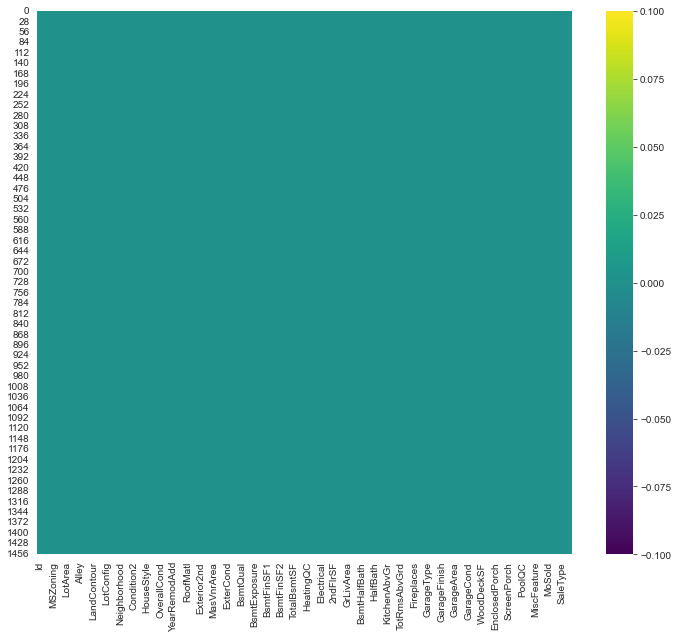

In [110]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(), cmap='viridis')

# Make Predictions on test.csv

In [111]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [112]:
df_test_id = df_test['Id']

In [113]:
df_test = df_test.drop('Id', axis=1)

## Fixing df_test columns for model

In [114]:
X_train.columns.difference(df_test.columns)

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Fa', 'Heating_GasA', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'PoolQC_Fa',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'Utilities_NoSeWa'],
      dtype='object')

In [115]:
X_train.shape

(1241, 259)

In [116]:
df_test.shape

(1459, 241)

In [117]:
df_test[['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Fa', 'Heating_GasA', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'PoolQC_Fa',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'Utilities_NoSeWa']] = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], index=df_test.index)

In [118]:
df_test.shape

(1459, 259)

### Reorder Columns

In [119]:
X_train_columns = X_train.columns

In [120]:
df_test = df_test[X_train_columns]

## Predictions

In [121]:
test_linear_pred = model.predict(df_test)

In [122]:
df_test['SalePrice'] = test_linear_pred

<AxesSubplot:>

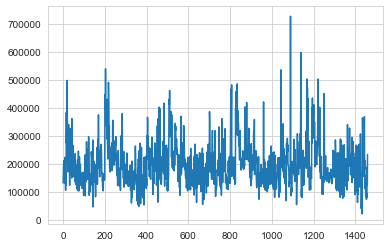

In [123]:
df_test['SalePrice'].plot()

In [124]:
#df_test = pd.concat([df_test_id, df_test], axis=1)

In [125]:
#df_test[['Id', 'SalePrice']].to_csv('SalePricePreditions.csv', index=False)

## XGBoost

In [126]:
import xgboost as xgb

In [127]:
xgb_model = xgb.XGBRegressor()

In [130]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [131]:
df_test.drop('SalePrice', axis=1, inplace=True)

In [132]:
xgb_pred = xgb_model.predict(df_test)

In [133]:
df_test['SalePrice'] = xgb_pred

<AxesSubplot:>

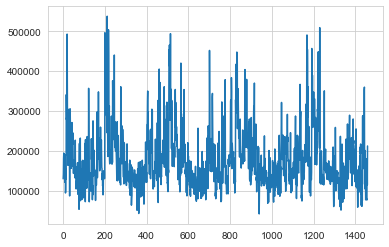

In [134]:
df_test['SalePrice'].plot()

In [135]:
df_test = pd.concat([df_test_id, df_test], axis=1)

In [136]:
df_test[['Id', 'SalePrice']].to_csv('SalePricePreditions_v2.csv', index=False)